In [1]:
# Make 2-D blobs and 10-D blobs. Each has 5 clusters.

from sklearn.datasets.samples_generator import make_blobs

random_state = 0

n_samples = 1000
centers = 6
cluster_std = 5

X_2d, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std / 7.5, n_features=2, random_state=random_state)
X_10d, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, n_features=10, random_state=random_state)

<IPython.core.display.Javascript object>


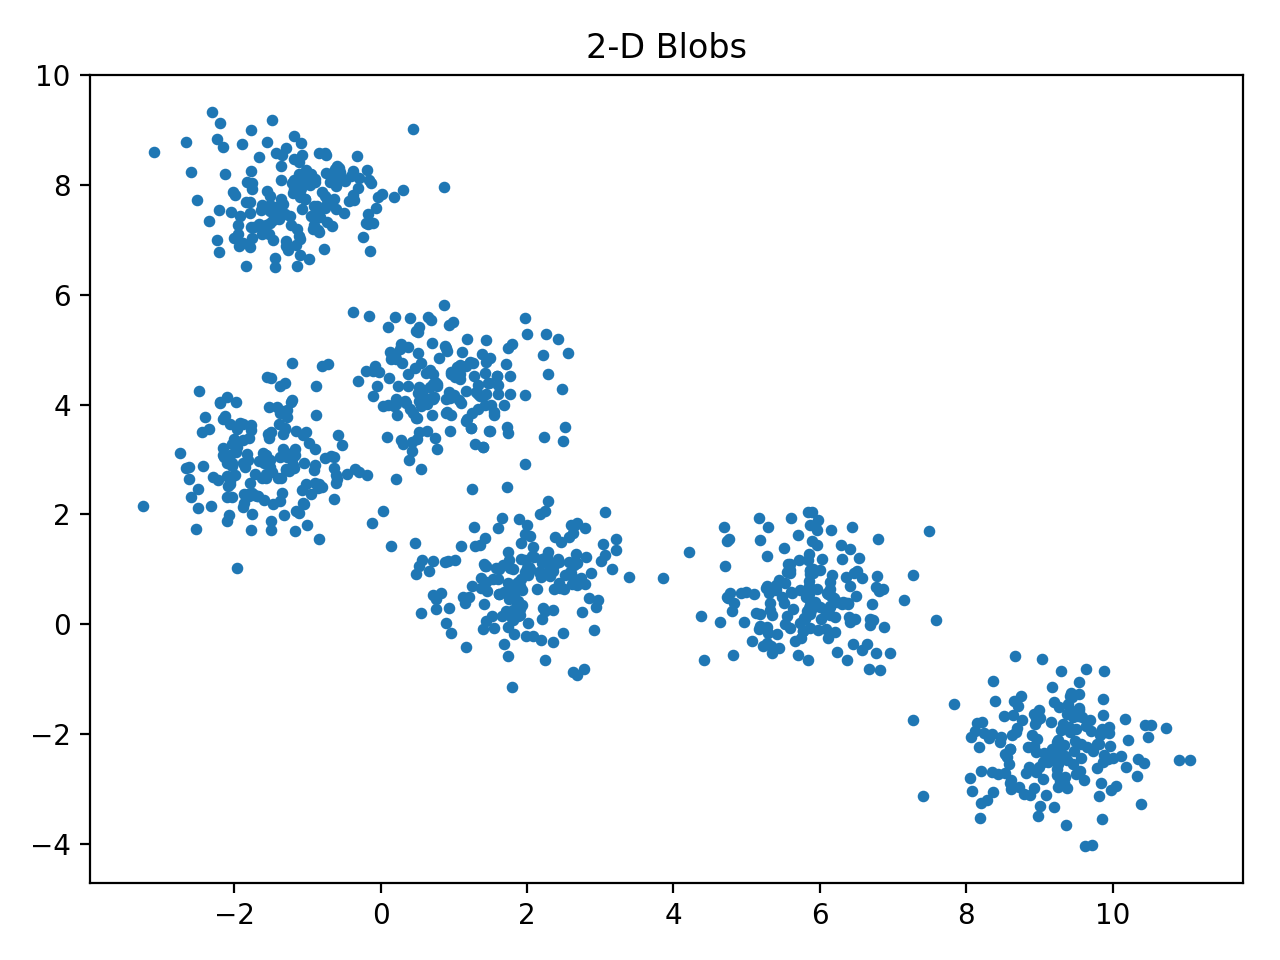

In [2]:
# Visualize 2-D blobs.

%matplotlib notebook
import matplotlib.pyplot as plt

batch_size = n_samples // 3
end = 0

fig, ax = plt.subplots()

ax.scatter(X_2d[:, 0], X_2d[:, 1], s=10)
ax.title.set_text('2-D Blobs')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


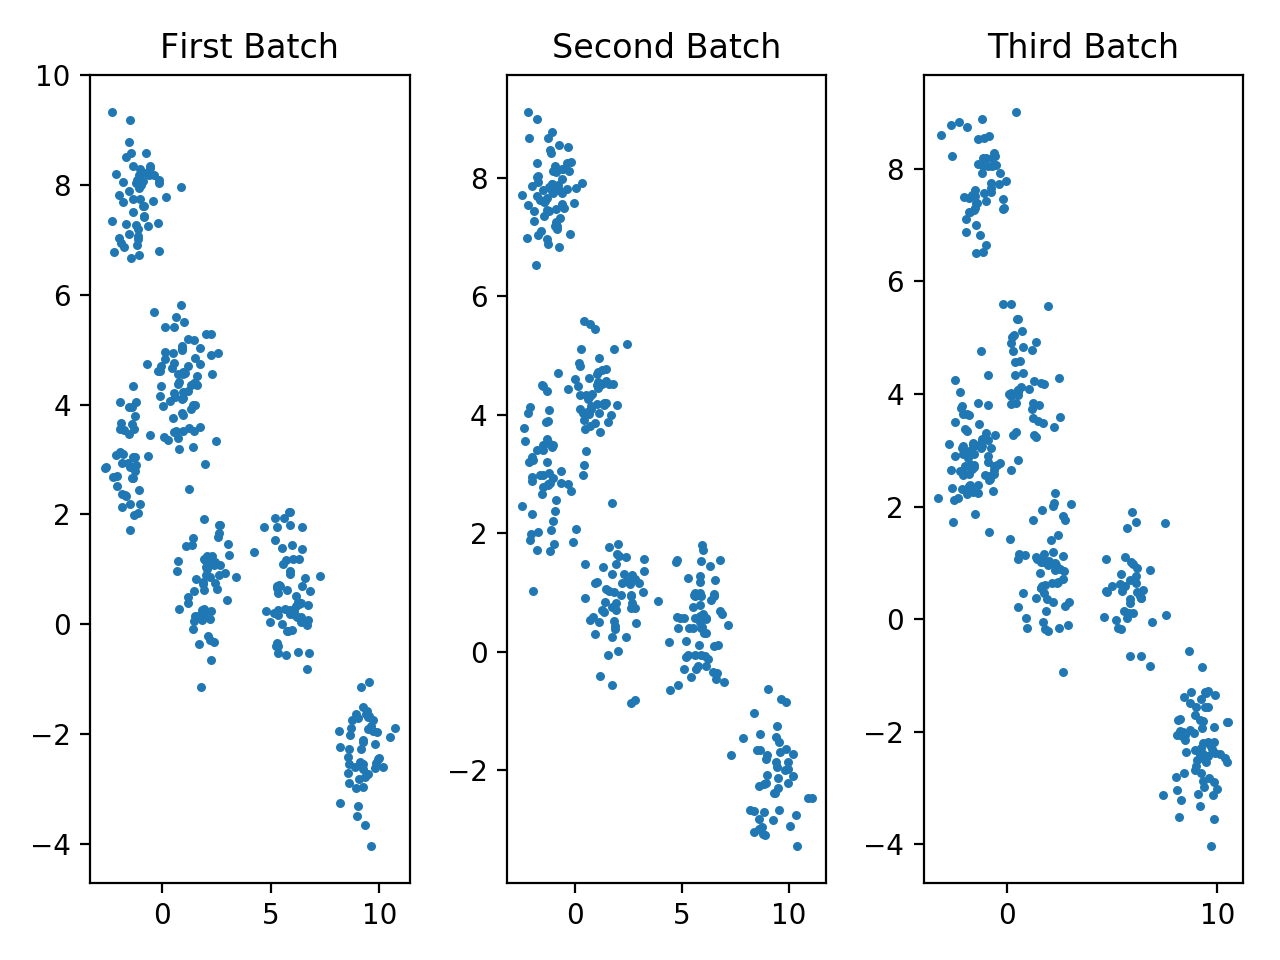

In [3]:
# Visualize 2-D blobs as stream.

batch_size = n_samples // 3
end = 0

fig, axes = plt.subplots(nrows=1, ncols=3)
for idx, (ax, order) in enumerate(zip(axes, ['First', 'Second', 'Third'])):
    start = end
    end = batch_size * (idx + 1)
    batch_2d = X_2d[start:end]
    
    ax.scatter(batch_2d[:, 0], batch_2d[:, 1], s=5)
    ax.title.set_text(f'{order} Batch')

plt.tight_layout()
plt.show()

In [4]:
# Cluster the two sets of blobs.

from sklearn.cluster import KMeans

n_clusters=6

labels_2d = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X_2d).labels_
labels_10d = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X_10d).labels_

<IPython.core.display.Javascript object>


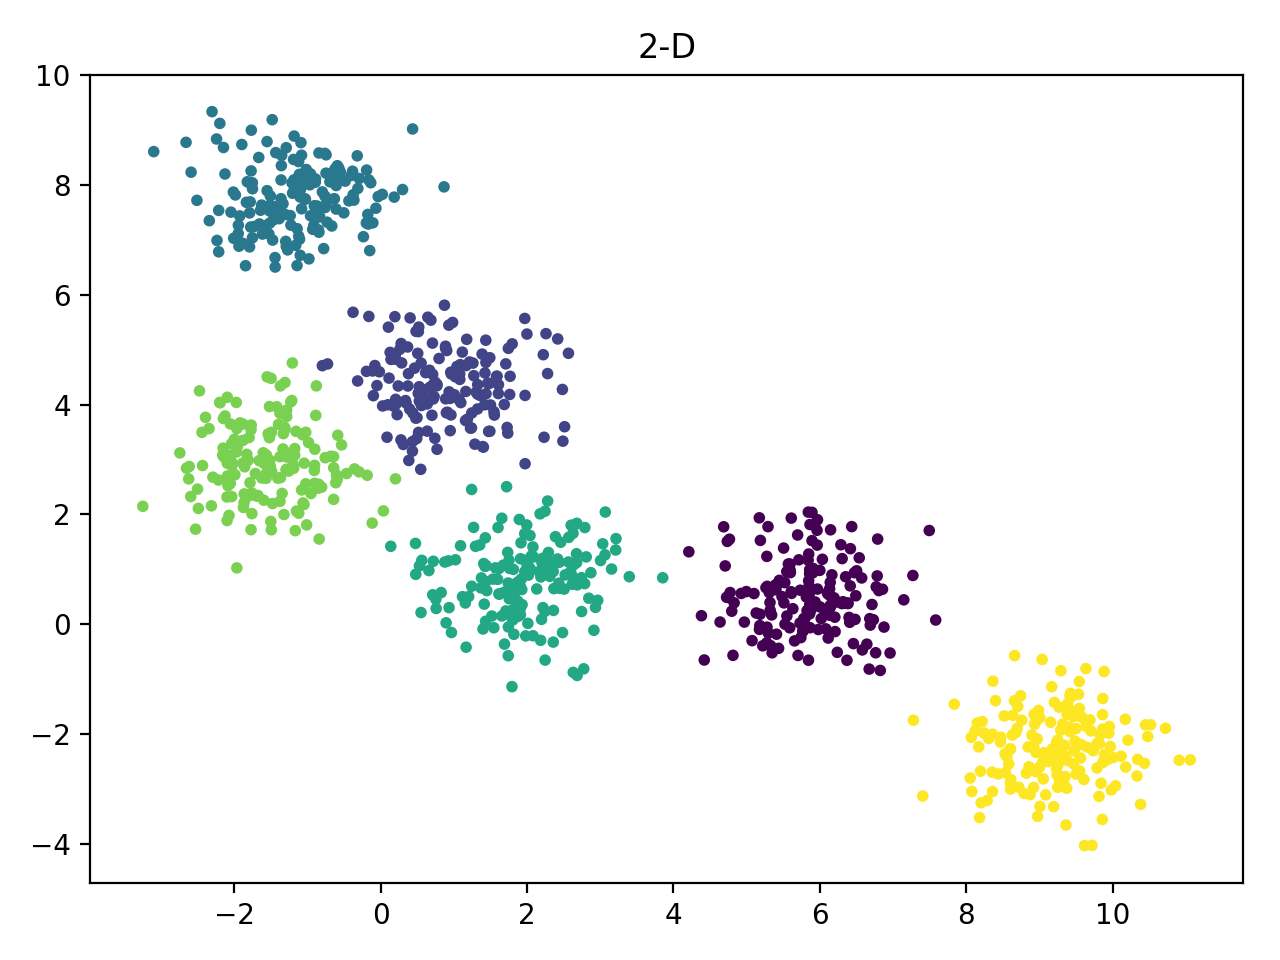

In [5]:
# Visualize clusters - 2-D.

fig, ax = plt.subplots()
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_2d.astype(float), s=10)
ax.title.set_text('2-D')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


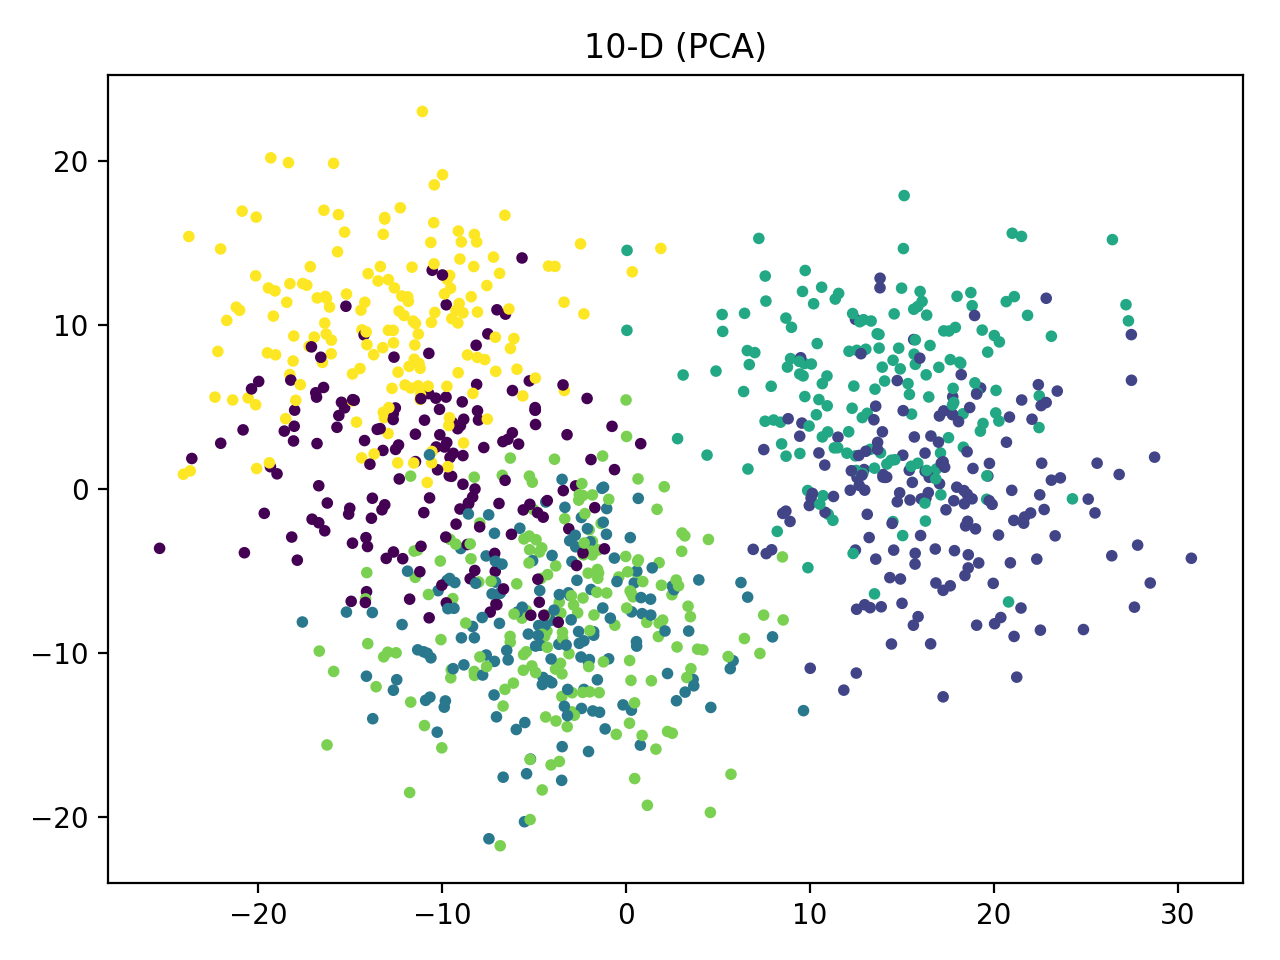

In [6]:
# Visualize clusters - PCA for 10-D.

fig, ax = plt.subplots()

from sklearn.decomposition import PCA

reduced_X_10d = PCA(n_components=2, random_state=random_state).fit_transform(X_10d)
ax.scatter(reduced_X_10d[:, 0], reduced_X_10d[:, 1], c=labels_10d.astype(float), s=10)
ax.title.set_text('10-D (PCA)')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


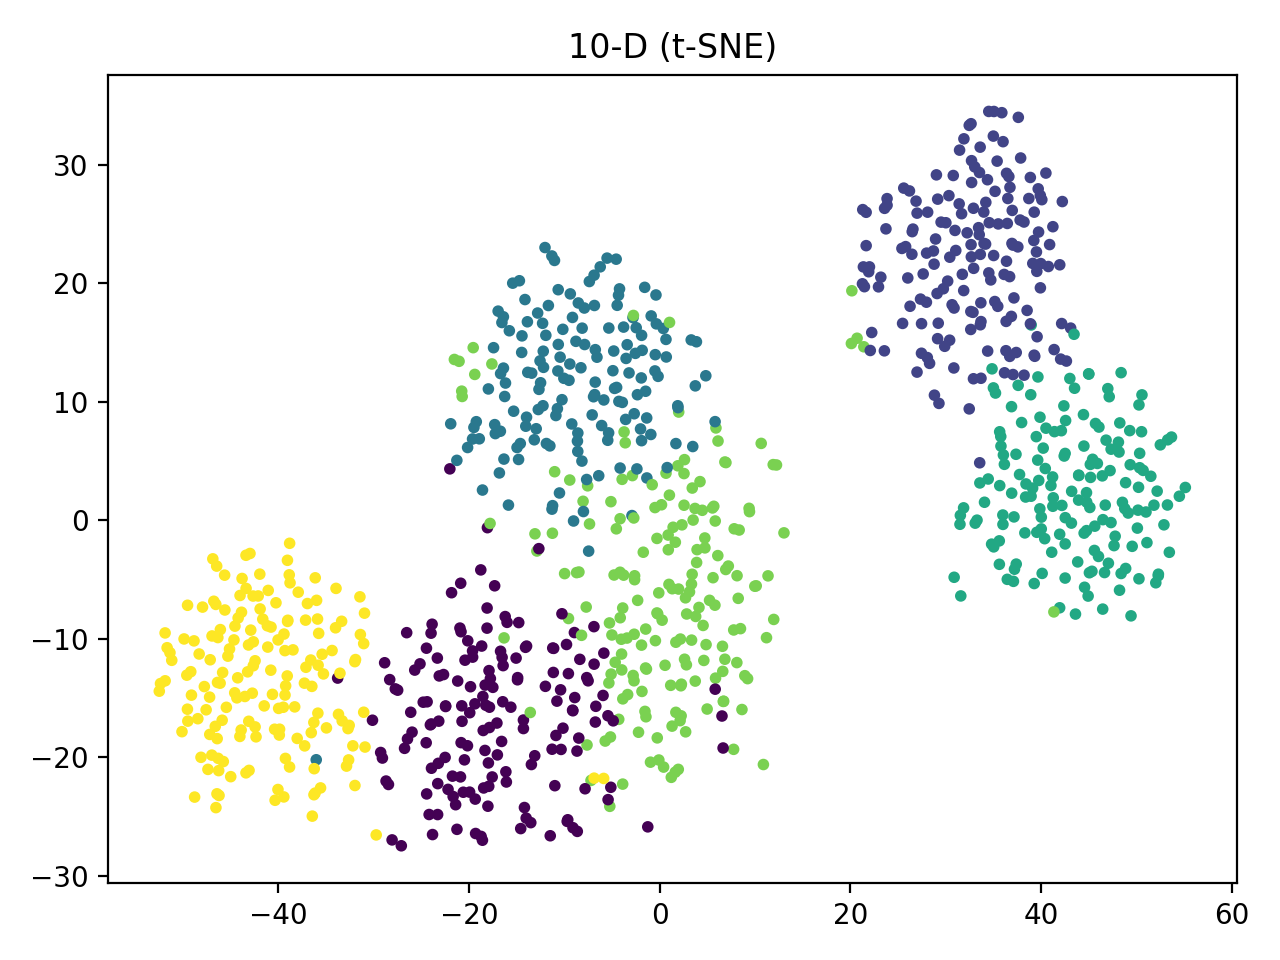

In [7]:
# Visualize clusters - t-SNE for 10-D.

fig, ax = plt.subplots()

from sklearn.manifold import TSNE

reduced_X_10d = TSNE(n_components=2, random_state=random_state).fit_transform(X_10d)
ax.scatter(reduced_X_10d[:, 0], reduced_X_10d[:, 1], c=labels_10d.astype(float), s=10)
ax.title.set_text('10-D (t-SNE)')

plt.tight_layout()
plt.subplots_adjust()
plt.show()

<IPython.core.display.Javascript object>


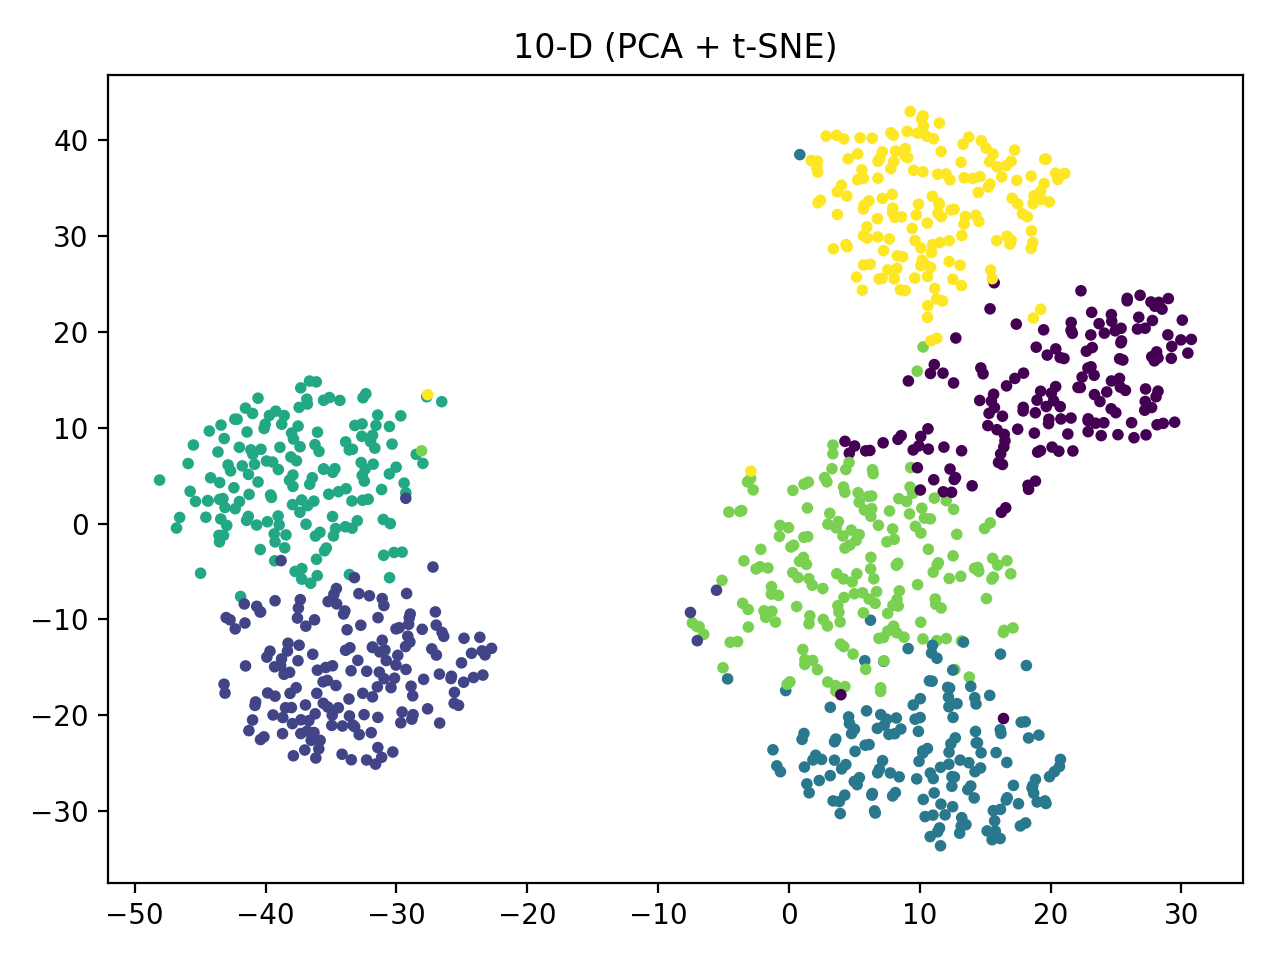

In [8]:
# Visualize clusters - t-SNE for 10-D with PCA feature selection.

fig, ax = plt.subplots()

reduced_X_10d = PCA(n_components=0.75, random_state=random_state).fit_transform(X_10d)
reduced_X_10d = TSNE(n_components=2, random_state=random_state).fit_transform(reduced_X_10d)
ax.scatter(reduced_X_10d[:, 0], reduced_X_10d[:, 1], c=labels_10d.astype(float), s=10)
ax.title.set_text('10-D (PCA + t-SNE)')

plt.tight_layout()
plt.subplots_adjust()
plt.show()

<IPython.core.display.Javascript object>


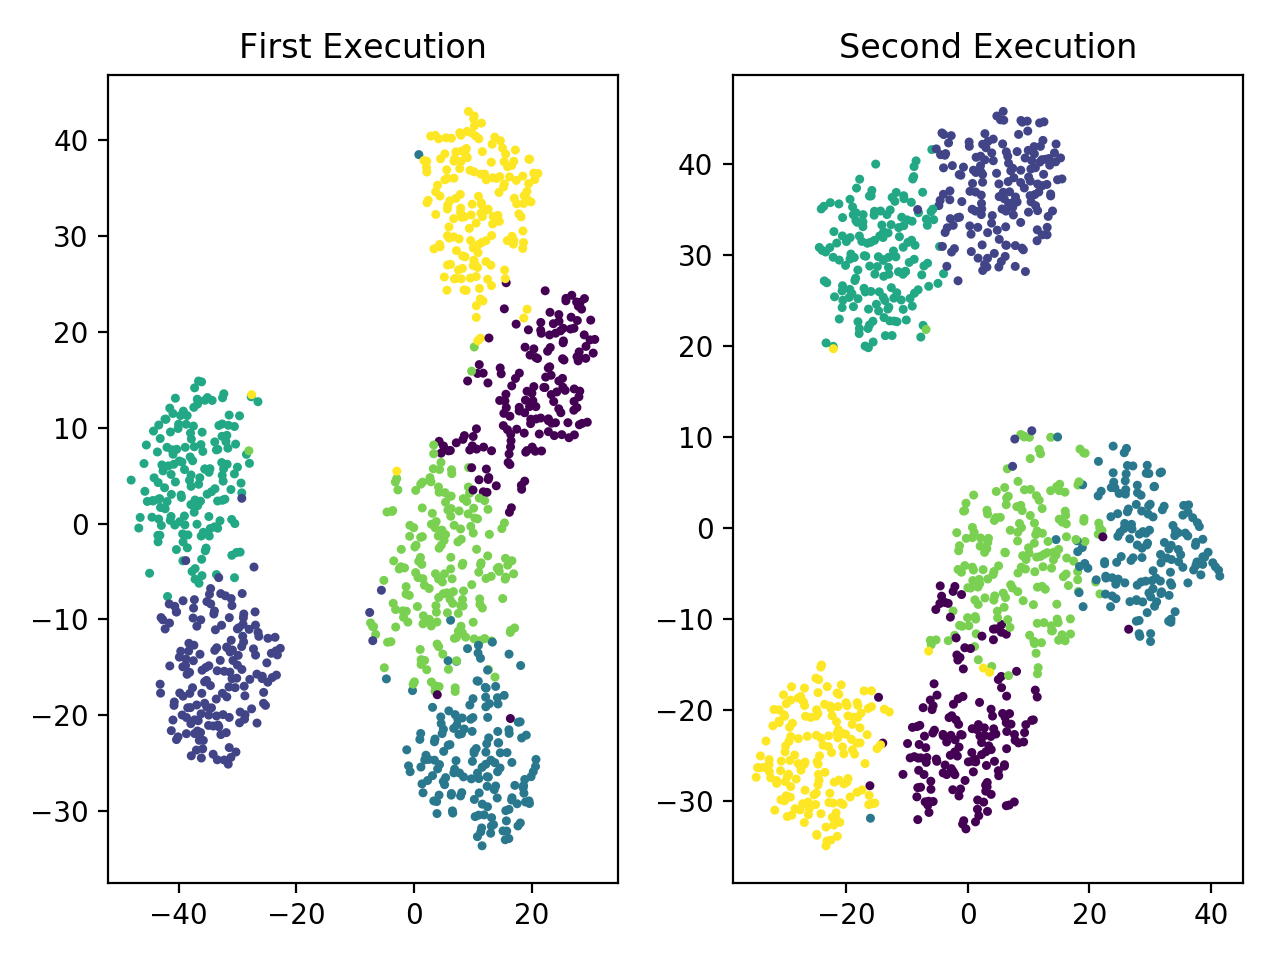

In [9]:
# Compare differen execution results.

fig, axes = plt.subplots(nrows=1, ncols=2)
for random_state, (ax, order) in enumerate(zip(list(axes), ['First', 'Second'])):
    reduced_X_10d = PCA(n_components=0.75, random_state=random_state).fit_transform(X_10d)
    reduced_X_10d = TSNE(n_components=2, random_state=random_state).fit_transform(reduced_X_10d)
    ax.scatter(reduced_X_10d[:, 0], reduced_X_10d[:, 1], c=labels_10d.astype(float), s=5)
    ax.title.set_text(f'{order} Execution')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


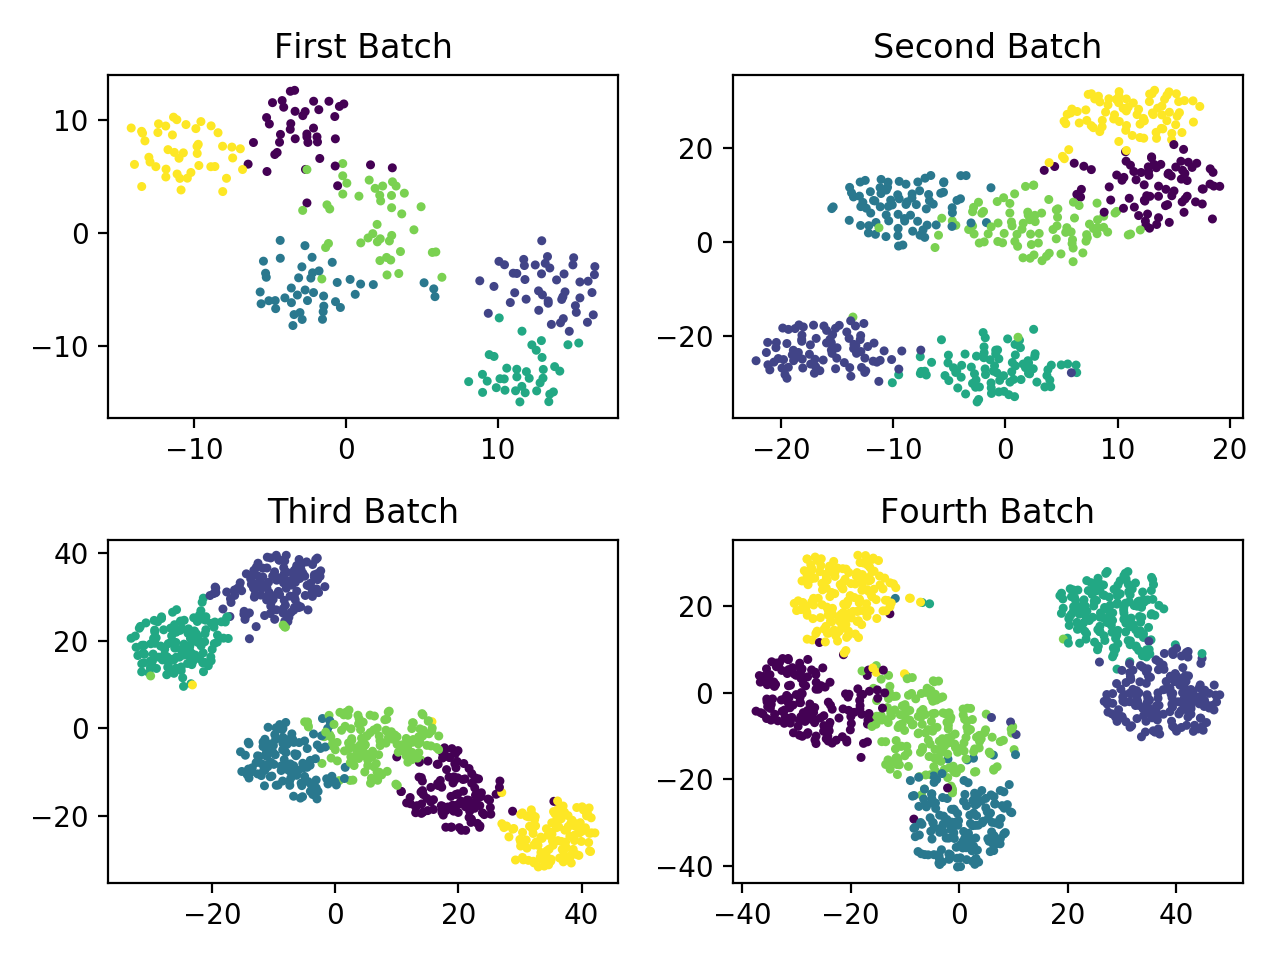

In [10]:
# Visualize batches of data.

batch_size = n_samples // 4

fig, axes = plt.subplots(nrows=2, ncols=2)
for idx, (ax, order) in enumerate(zip([ax for row in list(axes) for ax in row], ['First', 'Second', 'Third', 'Fourth'])):
    end = batch_size * (idx + 1)
    batch_10d = X_10d[:end]
    batch_labels_10d = labels_10d[:end]
    
    reduced_batch_10d = PCA(n_components=0.75, random_state=idx).fit_transform(batch_10d)
    reduced_batch_10d = TSNE(n_components=2, random_state=idx).fit_transform(reduced_batch_10d)
    ax.scatter(reduced_batch_10d[:, 0], reduced_batch_10d[:, 1], c=batch_labels_10d.astype(float), s=5)
    ax.title.set_text(f'{order} Batch')

plt.tight_layout()
plt.show()